### Data Ingestion & Quality Profiling
## 1.1 Load & Inspect

In [1]:
import pandas as pd

# Load the dataframe.
car_df = pd.read_csv('car_prices.csv')

# Display the first 5 rows.
display(car_df.head().style.set_caption("First 5 Rows of car_df"))

# Display the data types and record count.
car_df.info()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000000,16639.000000,white,black,kia motors america inc,20500.000000,21500.000000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000000,9393.000000,white,beige,kia motors america inc,20800.000000,21500.000000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.000000,1331.000000,gray,black,financial services remarketing (lease),31900.000000,30000.000000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.000000,14282.000000,white,black,volvo na rep/world omni,27500.000000,27750.000000,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.000000,2641.000000,gray,black,financial services remarketing (lease),66000.000000,67000.000000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## 1.2. Understanding the Data Structure

In [2]:
# Check the shape of the dataset (rows and columns)
print("Shape of the dataset:", car_df.shape)

# Display column names and data types (already displayed by car_df.info() in the previous cell)
print("\nColumn names and data types:")
print(car_df.dtypes)

Shape of the dataset: (558837, 16)

Column names and data types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


## 1.3 Missing & Anomaly Detection

In [6]:
# Quantify null values per column
null_counts = car_df.isnull().sum()

# Display the null counts
display(null_counts)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

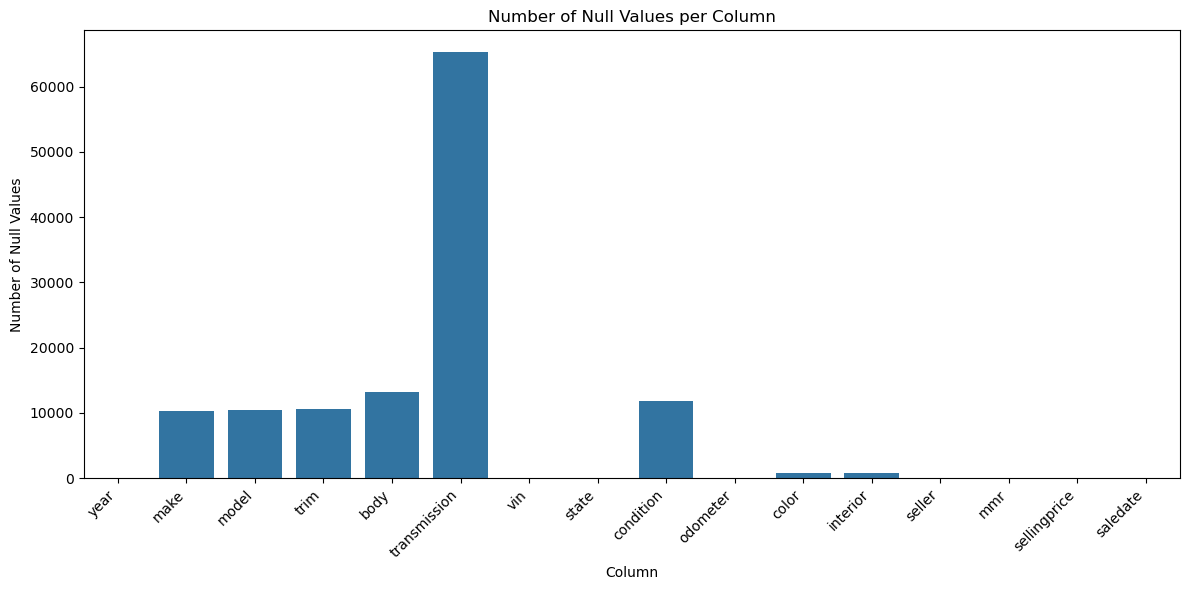

In [7]:
# visualize null
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Resolve null values by appropriate strategy based on the datatype and percentage of null values.

In [8]:
null_percentages = (null_counts / len(car_df)) * 100
display(null_percentages)
display(car_df.dtypes)

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [9]:
print("Null Value Handling Strategies:")
print("-" * 30)

# Numerical columns with null values (float64)
print("Numerical Columns:")
print("- condition (2.12% nulls): Impute with median, as condition might not be normally distributed.")
print("- odometer (0.02% nulls): Impute with median, as odometer readings can be skewed.")
print("- mmr (0.0068% nulls): Impute with median, as market values can have outliers.")
print("- sellingprice (0.0021% nulls): Impute with median, similar to mmr.")

print("\nCategorical/Object Columns:")
# Categorical or object type columns with null values
print("- make (1.84% nulls): Impute with mode, as it's a categorical feature.")
print("- model (1.86% nulls): Impute with mode, as it's a categorical feature.")
print("- trim (1.91% nulls): Impute with mode, as it's a categorical feature.")
print("- body (2.36% nulls): Impute with mode, as it's a categorical feature.")
print("- transmission (11.69% nulls): Impute with mode, as it's a categorical feature. Although the percentage is high, imputation with mode is a reasonable starting point for categorical data.")
print("- vin (0.0007% nulls): Drop rows, as VIN is a unique identifier and a small number of missing values won't significantly impact the dataset size. Imputation is not appropriate.")
print("- color (0.13% nulls): Impute with mode, as it's a categorical feature.")
print("- interior (0.13% nulls): Impute with mode, as it's a categorical feature.")
print("- saledate (0.0021% nulls): This is a date/time column. Depending on the use case, we could drop rows or potentially impute with the most frequent date if appropriate, but dropping rows seems safer given the low percentage and the nature of date data.")

print("-" * 30)

Null Value Handling Strategies:
------------------------------
Numerical Columns:
- condition (2.12% nulls): Impute with median, as condition might not be normally distributed.
- odometer (0.02% nulls): Impute with median, as odometer readings can be skewed.
- mmr (0.0068% nulls): Impute with median, as market values can have outliers.
- sellingprice (0.0021% nulls): Impute with median, similar to mmr.

Categorical/Object Columns:
- make (1.84% nulls): Impute with mode, as it's a categorical feature.
- model (1.86% nulls): Impute with mode, as it's a categorical feature.
- trim (1.91% nulls): Impute with mode, as it's a categorical feature.
- body (2.36% nulls): Impute with mode, as it's a categorical feature.
- transmission (11.69% nulls): Impute with mode, as it's a categorical feature. Although the percentage is high, imputation with mode is a reasonable starting point for categorical data.
- vin (0.0007% nulls): Drop rows, as VIN is a unique identifier and a small number of missing

In [11]:
# Impute numerical columns with median
numerical_cols_to_impute_median = ['condition', 'odometer', 'mmr', 'sellingprice']
for col in numerical_cols_to_impute_median:
    median_val = car_df[col].median()
    car_df[col].fillna(median_val, inplace=True)

# Impute categorical columns with mode
categorical_cols_to_impute_mode = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
for col in categorical_cols_to_impute_mode:
    mode_val = car_df[col].mode()[0]
    car_df[col].fillna(mode_val, inplace=True)

# Drop rows with nulls in 'vin' and 'saledate'
car_df.dropna(subset=['vin', 'saledate'], inplace=True)

# Verify that nulls have been handled
display(car_df.isnull().sum())

/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_12989/1210088832.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_df[col].fillna(median_val, inplace=True)
/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_12989/1210088832.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [14]:
# List all columns that contain missing values after handling missing values
columns_with_nulls = car_df.columns[car_df.isnull().any()].tolist()

# Print the list of column names that contain null values
print("Columns with missing values:", columns_with_nulls)

# Calculate the percentage of null values per column
null_percentages = (car_df.isnull().sum() / len(car_df)) * 100

# Display the null percentages
display(null_percentages.to_frame().style.set_caption("Percentage of Null Values per Column"))

Columns with missing values: []


,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,0.000000
odometer,0.000000


### Count number of duplicate records and delete if any present

In [16]:
# Count the number of duplicate rows
num_duplicates = car_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicate rows
car_df.drop_duplicates(inplace=True)

# Display the shape of the dataframe after removing duplicates to verify
print(f"Shape of the dataframe after removing duplicates: {car_df.shape}")

Number of duplicate rows: 0
Shape of the dataframe after removing duplicates: (558821, 16)


## 2. Data frames Queries:

### 2.1 Calculate the average, minimum, and maximum car price?

In [17]:
# Calculate the average car price
average_price = car_df['sellingprice'].mean()
# Calculate the minimum car price
min_price = car_df['sellingprice'].min()
# Calculate the maximum car price
max_price = car_df['sellingprice'].max()

# Display the calculated prices
print(f"Average Car Price: ${average_price:,.2f}")
print(f"Minimum Car Price: ${min_price:,.2f}")
print(f"Maximum Car Price: ${max_price:,.2f}")

Average Car Price: $13,611.36
Minimum Car Price: $1.00
Maximum Car Price: $230,000.00


### 2.2 List all unique colors of cars?

In [19]:
# Get all unique values from the 'color' column
unique_colors = car_df['color'].unique()

# Print the unique colors
print("Unique Colors:")
print(unique_colors)

Unique Colors:
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872' '12655'
 '15719' '6388' '16633' '11034' '6864' '339' '18384' '9887' '9837' '20627'
 '721' '6158' '5705' '18561' '2846' '5001']


### 2.3 Find the number of unique car brands and car models?

In [20]:
# Count the number of unique car brands (makes)
num_unique_makes = car_df['make'].nunique()
print(f"Number of unique car brands: {num_unique_makes}")

# Count the number of unique car models
num_unique_models = car_df['model'].nunique()
print(f"Number of unique car models: {num_unique_models}")

Number of unique car brands: 96
Number of unique car models: 973


### 2.4 Find all car information having selling prices greater than $165000?

In [21]:
high_priced_cars = car_df[car_df['sellingprice'] > 165000]
display(high_priced_cars)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


### 2.5 Find the top 5 most frequently sold car models?

In [22]:
# Count the occurrences of each car model and get the top 5
top_5_models = car_df['model'].value_counts().head(5)

# Display the top 5 most frequent models
display(top_5_models)

model
Altima    29748
F-150     14479
Fusion    12945
Camry     12545
Escape    11861
Name: count, dtype: int64

### 2.6 What is the average selling price of cars by brand (make)?

In [23]:
# Calculate the average selling price by car brand
average_price_by_make = car_df.groupby('make')['sellingprice'].mean()

# Display the average selling price by brand
display(average_price_by_make)

make
Acura           14017.268260
Aston Martin    54812.000000
Audi            19915.432782
BMW             21441.895748
Bentley         74367.672414
                    ...     
subaru           3710.416667
suzuki           4810.000000
toyota           7339.105263
volkswagen       6145.833333
vw              13672.916667
Name: sellingprice, Length: 96, dtype: float64

### 2.7 What is the minimum selling price of cars for each interior?

In [24]:
# Calculate the minimum selling price by car interior
min_price_by_interior = car_df.groupby('interior')['sellingprice'].min()

# Display the minimum selling price by interior
display(min_price_by_interior)

interior
beige         100.0
black           1.0
blue          150.0
brown         200.0
burgundy      175.0
gold          250.0
gray            1.0
green         100.0
off-white     900.0
orange       1200.0
purple        200.0
red           200.0
silver        150.0
tan           100.0
white         350.0
yellow       3100.0
—             150.0
Name: sellingprice, dtype: float64

### 2.8 Find highest odometer reading per year from highest to lowest order?

In [25]:
# Group by year and find the maximum odometer reading for each year
highest_odometer_per_year = car_df.groupby('year')['odometer'].max()

# Sort the results in descending order of odometer reading
highest_odometer_per_year_sorted = highest_odometer_per_year.sort_values(ascending=False)

# Display the results
display(highest_odometer_per_year_sorted)

year
1999    999999.0
2013    999999.0
2011    999999.0
2010    999999.0
2009    999999.0
2008    999999.0
2007    999999.0
2006    999999.0
2005    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2014    999999.0
1998    999999.0
1997    999999.0
1996    999999.0
1993    999999.0
2012    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64

### 2.9 Create a new column for car age (assuming the current year is 2025)

In [26]:
# Assuming the current year is 2025, calculate the car age
car_df['car_age'] = 2025 - car_df['year']

# Display the first few rows to show the new column
display(car_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11


### 2.10 Find the number of cars having a condition greater than or equal to 48 and odometer greater than 90000?

In [27]:
# Filter the dataframe for cars with condition >= 48 and odometer > 90000
filtered_cars = car_df[(car_df['condition'] >= 48) & (car_df['odometer'] > 90000)]

# Count the number of cars in the filtered dataframe
num_filtered_cars = len(filtered_cars)

# Display the count
print(f"Number of cars with condition >= 48 and odometer > 90000: {num_filtered_cars}")

Number of cars with condition >= 48 and odometer > 90000: 746


### 2.11 Which state consistently has higher car prices for newer cars(year>2013)?

In [28]:
# Filter the DataFrame to include only cars manufactured after the year 2013
car_df_newer = car_df[car_df['year'] > 2013]

# Display the first few rows of the new DataFrame
display(car_df_newer.head())

# Display the shape of the new DataFrame to verify the filtering
print(f"Shape of the new DataFrame (cars after 2013): {car_df_newer.shape}")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11


Shape of the new DataFrame (cars after 2013): (90501, 17)


In [29]:
# Group the filtered data by state and calculate price statistics
price_distribution_by_state = car_df_newer.groupby('state')['sellingprice'].agg(['mean', 'median', 'std'])

# Display the resulting DataFrame
display(price_distribution_by_state)

,mean,median,std
state,,,
3vwd17aj0fm227318,13700.000000,13700.0,NaN
3vwd17aj2fm258506,13300.000000,13300.0,NaN
3vwd17aj2fm261566,13400.000000,13400.0,NaN
3vwd17aj2fm285365,14050.000000,14050.0,NaN
3vwd17aj3fm276741,13200.000000,13200.0,NaN
3vwd17aj4fm201708,13200.000000,13200.0,NaN
3vwd17aj4fm236636,13400.000000,13400.0,NaN
3vwd17aj5fm206111,14000.000000,14000.0,NaN
3vwd17aj5fm219943,13600.000000,13600.0,NaN


In [30]:
# Sort the price distribution by mean and median in descending order
price_distribution_sorted = price_distribution_by_state.sort_values(by=['mean', 'median'], ascending=False)

# Display the sorted price distribution
display(price_distribution_sorted)

# Based on the sorted mean and median, and considering the standard deviation,
# identify states with consistently higher prices.
# States with high mean and median and relatively lower standard deviation might indicate more consistently high prices.
# However, given the relatively small sample size for some states and the task's qualitative nature,
# states at the top of the sorted list for both mean and median are good candidates.

print("\nStates with potentially consistently higher car prices for cars manufactured after 2013:")

# We can select the top few states based on the sorted mean and median.
# Let's consider states in the top 5 for both mean and median as potentially having consistently higher prices.
# Note: This is a qualitative assessment based on the available data.

# Get the top 5 states by mean
top_5_by_mean = price_distribution_sorted.head(5).index.tolist()

# Get the top 5 states by median
top_5_by_median = price_distribution_by_state.sort_values(by='median', ascending=False).head(5).index.tolist()

# Identify states that are in the top 5 for both mean and median
consistently_higher_price_states = list(set(top_5_by_mean) & set(top_5_by_median))

if consistently_higher_price_states:
    print(consistently_higher_price_states)
    print("\nReasoning:")
    print("These states are in the top 5 when sorted by both average and median selling price for cars manufactured after 2013.")
    print("While standard deviation varies, their high mean and median suggest generally higher prices compared to other states in this dataset for newer cars.")
else:
    print("No states were consistently in the top 5 for both mean and median selling prices.")


,mean,median,std
state,,,
oh,28020.221053,22600.0,15847.594159
ab,25204.255319,25000.0,8430.049333
nj,24237.063973,20500.0,13784.717704
on,22962.560386,21500.0,7016.651060
qc,22722.938144,22200.0,6659.373113
pa,22190.227241,18900.0,11574.871816
tn,21841.683217,19800.0,9643.115815
mi,21411.620976,19600.0,8243.135500
ca,20951.319411,17300.0,14000.302837



States with potentially consistently higher car prices for cars manufactured after 2013:
['on', 'ab', 'nj', 'qc', 'oh']

Reasoning:
These states are in the top 5 when sorted by both average and median selling price for cars manufactured after 2013.
While standard deviation varies, their high mean and median suggest generally higher prices compared to other states in this dataset for newer cars.


### 2.12 For cars with excellent condition (top 20%), which makes have the lowest average price (value for money)?

In [31]:
# Calculate the 80th percentile of the 'condition' column
condition_threshold = car_df['condition'].quantile(0.8)

# Print the condition threshold
print(f"Threshold for the top 20% of car conditions: {condition_threshold}")

Threshold for the top 20% of car conditions: 43.0


In [32]:
# Filter the car_df DataFrame to include only cars with a condition within the top 20%
excellent_condition_cars_df = car_df[car_df['condition'] >= condition_threshold].copy()

# Display the first few rows of the new DataFrame to verify the filtering
display(excellent_condition_cars_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11
10,2014,Audi,A6,3.0T Prestige quattro,Sedan,automatic,wauhgafc0en062916,ca,48.0,14414.0,black,black,desert auto trade,47300.0,49750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),11
11,2015,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,48.0,2034.0,red,tan,kia motors finance,15150.0,17700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST),10
17,2014,Audi,Q5,2.0T Premium Plus quattro,SUV,automatic,wa1lfafpxea085074,ca,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11


In [33]:
# Group by 'make' and calculate the average selling price for cars in excellent condition
average_price_excellent_condition_by_make = excellent_condition_cars_df.groupby('make')['sellingprice'].mean()

# Display the average selling price by make for excellent condition cars
display(average_price_excellent_condition_by_make)

make
Acura           23295.343840
Aston Martin    59125.000000
Audi            31917.639485
BMW             32242.705077
Bentley         96040.000000
                    ...     
smart            6835.759494
subaru           6200.000000
toyota          16787.500000
volkswagen      21600.000000
vw              19128.571429
Name: sellingprice, Length: 76, dtype: float64

In [34]:
# Sort the average selling prices by make in ascending order
sorted_average_price_excellent_condition_by_make = average_price_excellent_condition_by_make.sort_values(ascending=True)

# Display the sorted Series
display(sorted_average_price_excellent_condition_by_make)

make
Isuzu            1125.000000
Oldsmobile       1910.000000
honda            4233.333333
Saturn           5700.406504
subaru           6200.000000
                   ...      
Tesla           66580.000000
Bentley         96040.000000
Lamborghini    113000.000000
Ferrari        137888.888889
Rolls-Royce    152714.285714
Name: sellingprice, Length: 76, dtype: float64

## 3. Data Visualization and insights:
### 3.1 Show the correlation of all the features(columns) having numerical values(e.g. selling price, odometer).

In [35]:
# Select only the columns with numerical datatypes
car_df_numerical = car_df.select_dtypes(include=['number'])

# Display the first few rows of the numerical dataframe to verify the selection
display(car_df_numerical.head())

,year,condition,odometer,mmr,sellingprice,car_age
0,2015,5.0,16639.0,20500.0,21500.0,10
1,2015,5.0,9393.0,20800.0,21500.0,10
2,2014,45.0,1331.0,31900.0,30000.0,11
3,2015,41.0,14282.0,27500.0,27750.0,10
4,2014,43.0,2641.0,66000.0,67000.0,11


In [36]:
# Calculate the correlation matrix
correlation_matrix = car_df_numerical.corr()

# Display the correlation matrix
display(correlation_matrix)

,year,condition,odometer,mmr,sellingprice,car_age
year,1.000000,0.323579,-0.772410,0.596605,0.586484,-1.000000
condition,0.323579,1.000000,-0.304591,0.273153,0.313121,-0.323579
odometer,-0.772410,-0.304591,1.000000,-0.587967,-0.582274,0.772410
mmr,0.596605,0.273153,-0.587967,1.000000,0.983634,-0.596605
sellingprice,0.586484,0.313121,-0.582274,0.983634,1.000000,-0.586484
car_age,-1.000000,-0.323579,0.772410,-0.596605,-0.586484,1.000000


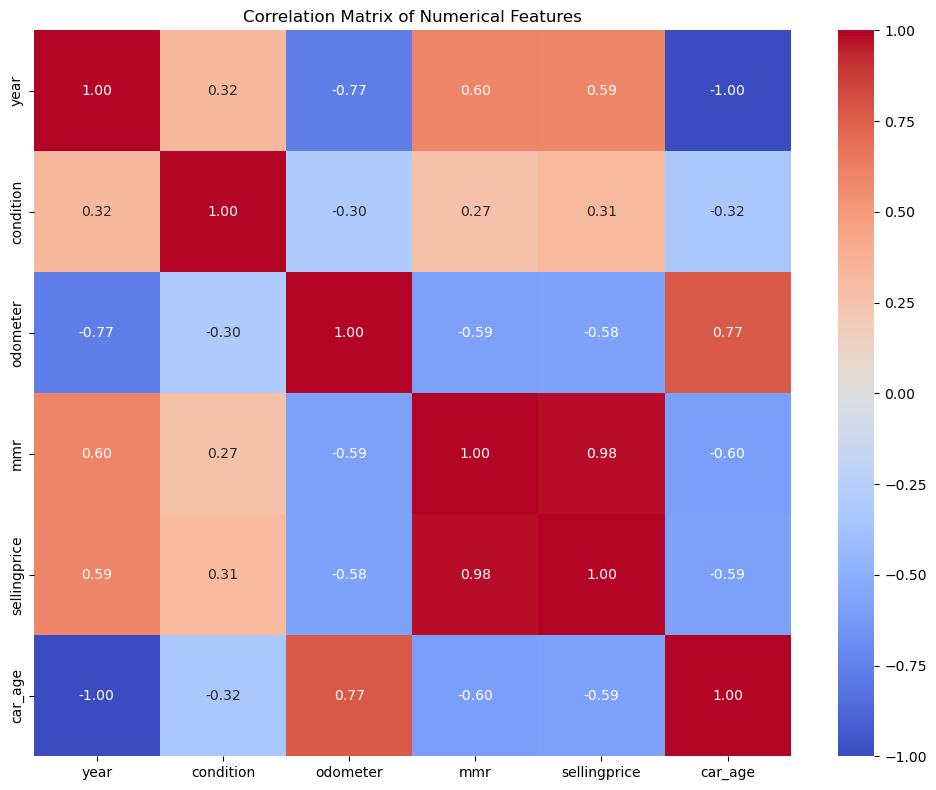

In [37]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

### 3.2 Plot a graph to show the average selling price by year and explain the pattern you notice from the graph. Which plot will you use bar or scatter?

In [38]:
# Group by year and calculate the average selling price for each year
average_price_by_year = car_df.groupby('year')['sellingprice'].mean()

# Display the average selling price by year
display(average_price_by_year)

year
1982    12750.000000
1983     5250.000000
1984     2160.000000
1985     3520.000000
1986     2538.636364
1987     1512.500000
1988     3168.181818
1989     1620.000000
1990     1435.714286
1991      943.656716
1992      991.666667
1993      833.902439
1994      870.599490
1995      913.292546
1996      985.781434
1997     1157.454722
1998     1261.719404
1999     1533.696105
2000     1827.834130
2001     2131.014224
2002     2611.709315
2003     3447.268654
2004     4321.474455
2005     4893.989857
2006     6190.204808
2007     8021.969687
2008     9508.054092
2009    10462.313295
2010    12412.453313
2011    15851.677185
2012    16653.749836
2013    17476.602700
2014    20090.200535
2015    25937.304145
Name: sellingprice, dtype: float64

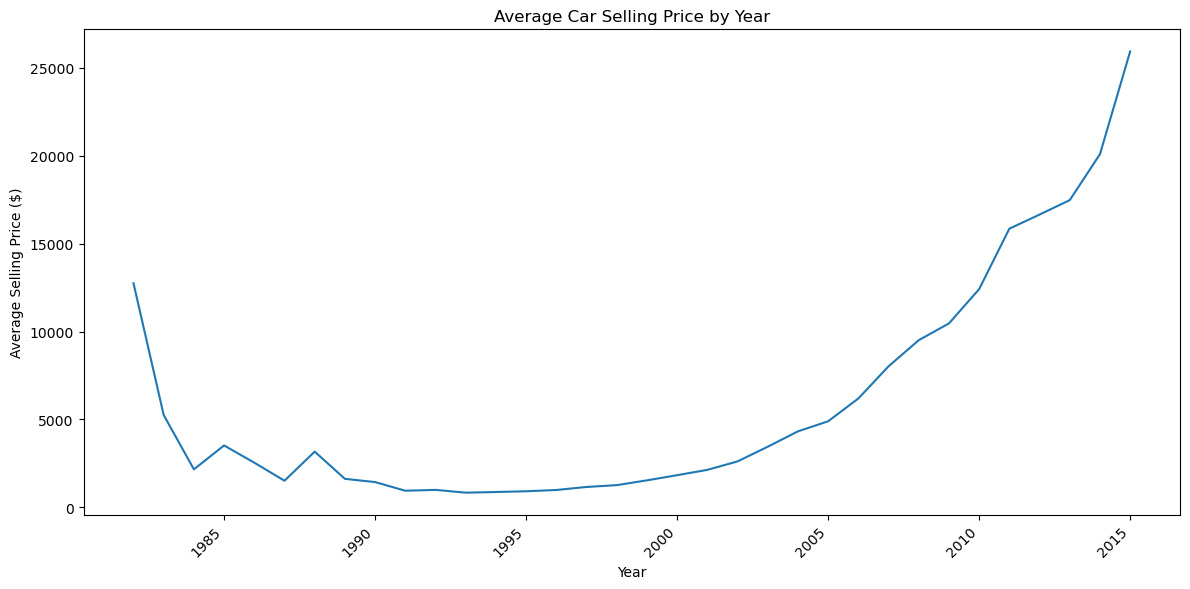

In [39]:
# Generate a line plot of the average selling price by year
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values)

# Add a title and labels
plt.title("Average Car Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Selling Price ($)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### 3.3 Plot a graph to show average selling price by odometer and explain the trend you notice from the graph.

In [40]:
# Create bins for the 'odometer' column using quantiles to handle skewness
# Using 10 bins as a starting point, but this can be adjusted based on the data distribution
car_df['odometer_bin'] = pd.qcut(car_df['odometer'], q=10, labels=False, duplicates='drop')

# Group the car_df DataFrame by the created odometer bins and calculate the average selling price
average_price_by_odometer = car_df.groupby('odometer_bin')['sellingprice'].mean()

# Display the average selling price by odometer bin
display(average_price_by_odometer)

odometer_bin
0    21954.605081
1    20002.484091
2    18764.711469
3    17314.482291
4    16192.474063
5    13662.795774
6    10997.662694
7     8154.542080
8     5641.125192
9     3425.931014
Name: sellingprice, dtype: float64

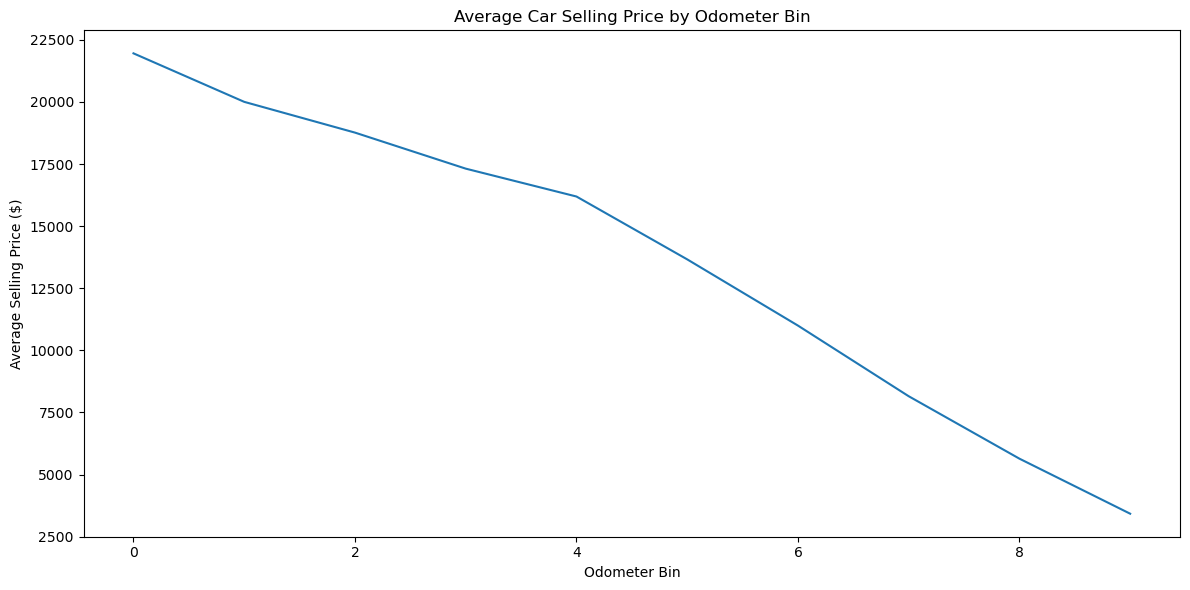

In [41]:
# Create a new figure for the plot with a specified size
plt.figure(figsize=(12, 6))

# Generate a line plot using the average_price_by_odometer Series
plt.plot(average_price_by_odometer.index, average_price_by_odometer.values)

# Add a title to the plot
plt.title("Average Car Selling Price by Odometer Bin")

# Label the x-axis as "Odometer Bin" and the y-axis as "Average Selling Price ($)"
plt.xlabel("Odometer Bin")
plt.ylabel("Average Selling Price ($)")

# Use plt.tight_layout() to adjust plot parameters for a tight layout
plt.tight_layout()

# Display the plot
plt.show()

### 3.4 Plot a graph to show the number of cars sold in each state. Find the top three highest car selling states by having a look at the graph?

In [42]:
# Group the car_df DataFrame by 'state' and count the number of cars sold in each state
cars_sold_by_state = car_df.groupby('state')['vin'].count()

# Display the number of cars sold by state
display(cars_sold_by_state)

state
3vwd17aj0fm227318        1
3vwd17aj2fm258506        1
3vwd17aj2fm261566        1
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj4fm201708        1
3vwd17aj4fm236636        1
3vwd17aj5fm206111        1
3vwd17aj5fm219943        1
3vwd17aj5fm221322        1
3vwd17aj5fm225953        1
3vwd17aj5fm268964        1
3vwd17aj5fm273601        1
3vwd17aj5fm297123        1
3vwd17aj6fm218641        1
3vwd17aj6fm231972        1
3vwd17aj7fm218440        1
3vwd17aj7fm223475        1
3vwd17aj7fm229552        1
3vwd17aj7fm326640        1
3vwd17aj9fm219766        1
3vwd17ajxfm315938        1
ab                     928
al                      26
az                    8740
ca                   73148
co                    7775
fl                   82945
ga                   34750
hi                    1237
il                   23478
in                    4325
la                    2191
ma                    6729
md                   11157
mi                   15511
mn                    

In [43]:
# Sort the states by the number of cars sold in descending order and get the top 3
top_3_selling_states = cars_sold_by_state.sort_values(ascending=False).head(3)

# Display the top 3 highest selling states
print("Top 3 Highest Selling States:")
display(top_3_selling_states)

Top 3 Highest Selling States:


state
fl    82945
ca    73148
pa    53907
Name: vin, dtype: int64

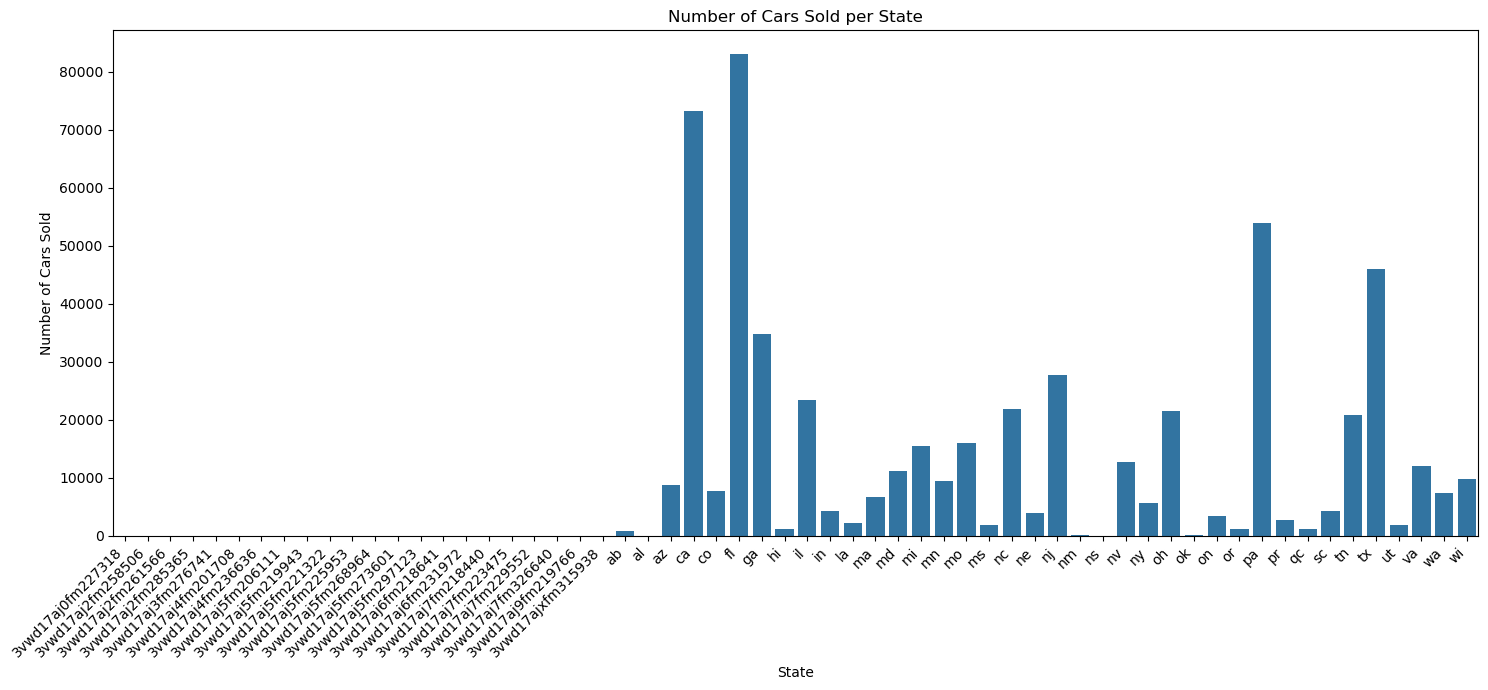

In [44]:
# Create a figure for the bar plot with a specified size
plt.figure(figsize=(15, 7))

# Generate a bar plot using the cars_sold_by_state Series
sns.barplot(x=cars_sold_by_state.index, y=cars_sold_by_state.values)

# Add a title to the plot
plt.title("Number of Cars Sold per State")

# Label the x-axis as "State" and the y-axis as "Number of Cars Sold"
plt.xlabel("State")
plt.ylabel("Number of Cars Sold")

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# Adjust plot parameters for a tight layout
plt.tight_layout()

# Display the plot
plt.show()

### 3.5 Plot a bar graph of average selling price by condition score ranges of size 5. Give a summary of the insights.

In [45]:
# Create bins for the 'condition' column with a range size of 5
# The bins will be from 0 to 50 with intervals of 5. The right=False means the intervals are [left, right).
# Labels are created to represent the range of each bin.
car_df['condition_range'] = pd.cut(car_df['condition'], bins=range(0, 55, 5), right=False, labels=[f'{i}-{i+4}' for i in range(0, 50, 5)])

# Display the first few rows of the car_df DataFrame to show the new condition_range column
display(car_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age,odometer_bin,condition_range
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,1,5-9
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,0,5-9
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11,0,45-49
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10,0,40-44
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11,0,40-44


In [46]:
# Group the car_df DataFrame by the 'condition_range' column and calculate the average selling price for each range
average_price_by_condition_range = car_df.groupby('condition_range')['sellingprice'].mean()

# Display the average selling price by condition range
display(average_price_by_condition_range)

/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_12989/2826343750.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_condition_range = car_df.groupby('condition_range')['sellingprice'].mean()


condition_range
0-4      10749.690767
5-9      24724.724915
10-14     3748.153266
15-19     5065.839334
20-24     7859.612359
25-29     9846.657156
30-34    12221.476758
35-39    13889.941413
40-44    18301.752494
45-49    21235.647929
Name: sellingprice, dtype: float64

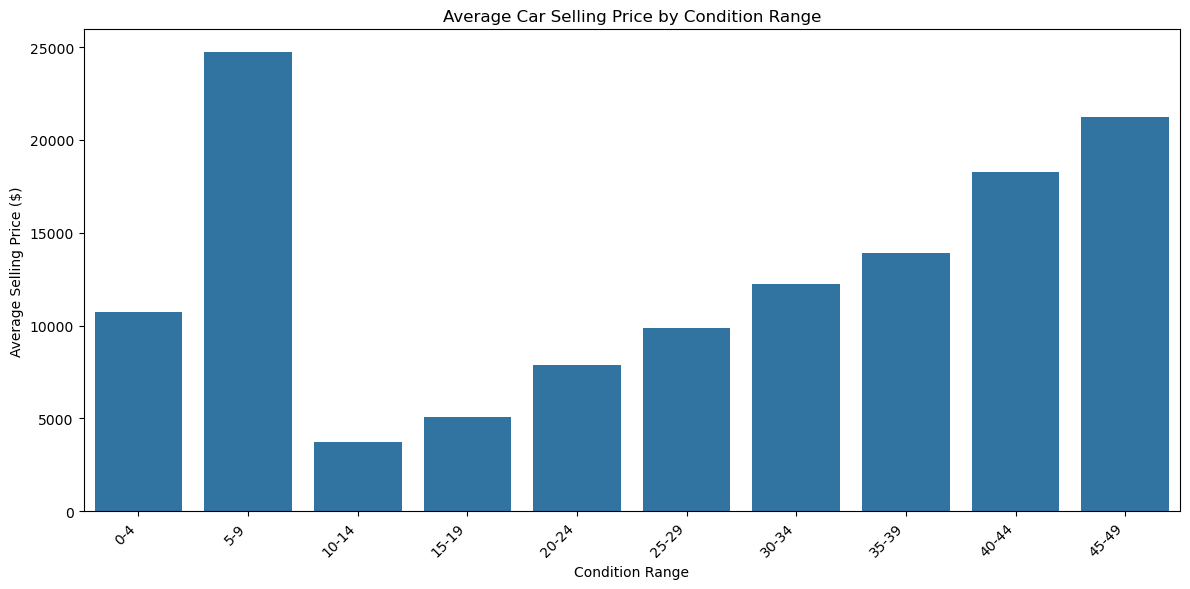

In [47]:
# Create a figure for the bar plot with a specified size
plt.figure(figsize=(12, 6))

# Generate a bar plot using the average_price_by_condition_range Series
sns.barplot(x=average_price_by_condition_range.index, y=average_price_by_condition_range.values)

# Add a title to the plot
plt.title("Average Car Selling Price by Condition Range")

# Label the x-axis as "Condition Range" and the y-axis as "Average Selling Price ($)"
plt.xlabel("Condition Range")
plt.ylabel("Average Selling Price ($)")

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Adjust plot parameters for a tight layout
plt.tight_layout()

# Display the plot
plt.show()

### 3.6 Plot a bar graph of no. of cars sold by condition ranges of size 10. Give some insights from the graph.

In [48]:
# Create bins for the 'condition' column with a range size of 10
# The bins will be from 0 up to a value that covers the maximum condition score (e.g., 50) with intervals of 10.
# The right=False means the intervals are [left, right).
# Labels are created to represent the range of each bin.
car_df['condition_range_10'] = pd.cut(car_df['condition'], bins=range(0, 55, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 50, 10)])

# Display the first few rows of the car_df DataFrame to show the newly created 'condition_range_10' column
display(car_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age,odometer_bin,condition_range,condition_range_10
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,1,5-9,0-9
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,0,5-9,0-9
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11,0,45-49,40-49
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10,0,40-44,40-49
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11,0,40-44,40-49


In [49]:
# Group the car_df DataFrame by the 'condition_range_10' column and count the number of cars in each range
cars_by_condition_range = car_df.groupby('condition_range_10').size()

# Display the number of cars by condition range
display(cars_by_condition_range)

/var/folders/7v/b4cx31gj2m15lfjrqk3sy1240000gp/T/ipykernel_12989/3398483375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cars_by_condition_range = car_df.groupby('condition_range_10').size()


condition_range_10
0-9       70100
10-19     43562
20-29    111695
30-39    173491
40-49    159973
dtype: int64

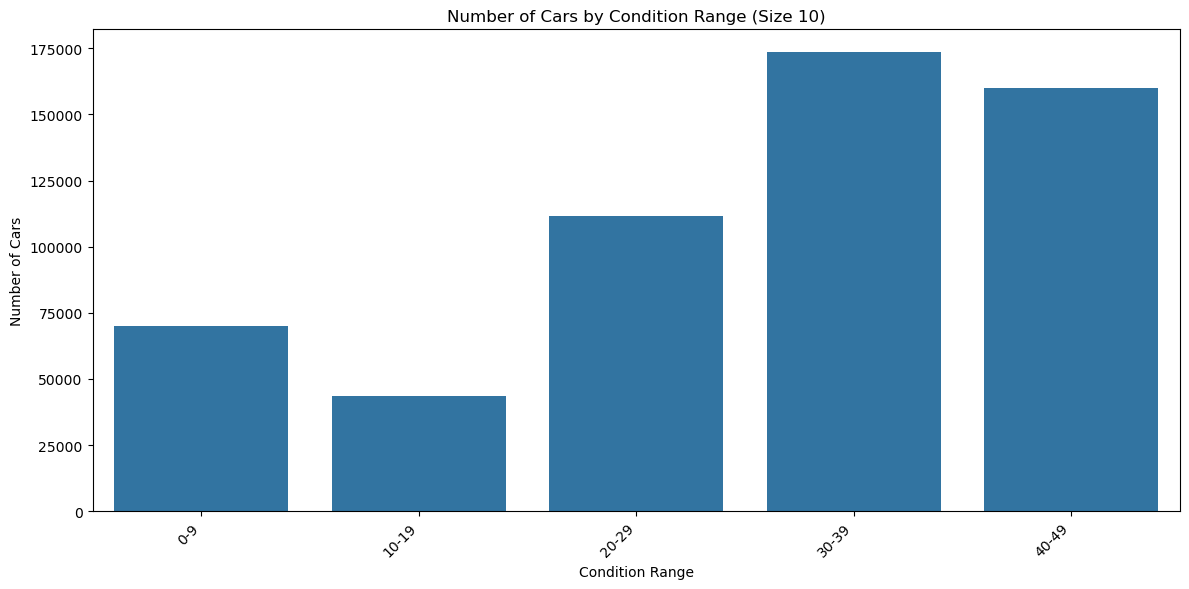

In [50]:
# Create a figure for the bar plot with a specified size
plt.figure(figsize=(12, 6))

# Generate a bar plot using the cars_by_condition_range Series
sns.barplot(x=cars_by_condition_range.index, y=cars_by_condition_range.values)

# Add a title to the plot
plt.title("Number of Cars by Condition Range (Size 10)")

# Label the x-axis as "Condition Range" and the y-axis as "Number of Cars"
plt.xlabel("Condition Range")
plt.ylabel("Number of Cars")

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# Adjust plot parameters for a tight layout
plt.tight_layout()

# Display the plot
plt.show()

### 3.7 Plot a box plot to show the distribution of car selling prices grouped by color. Extract insights and if required, remove outliers and plot the graph again.

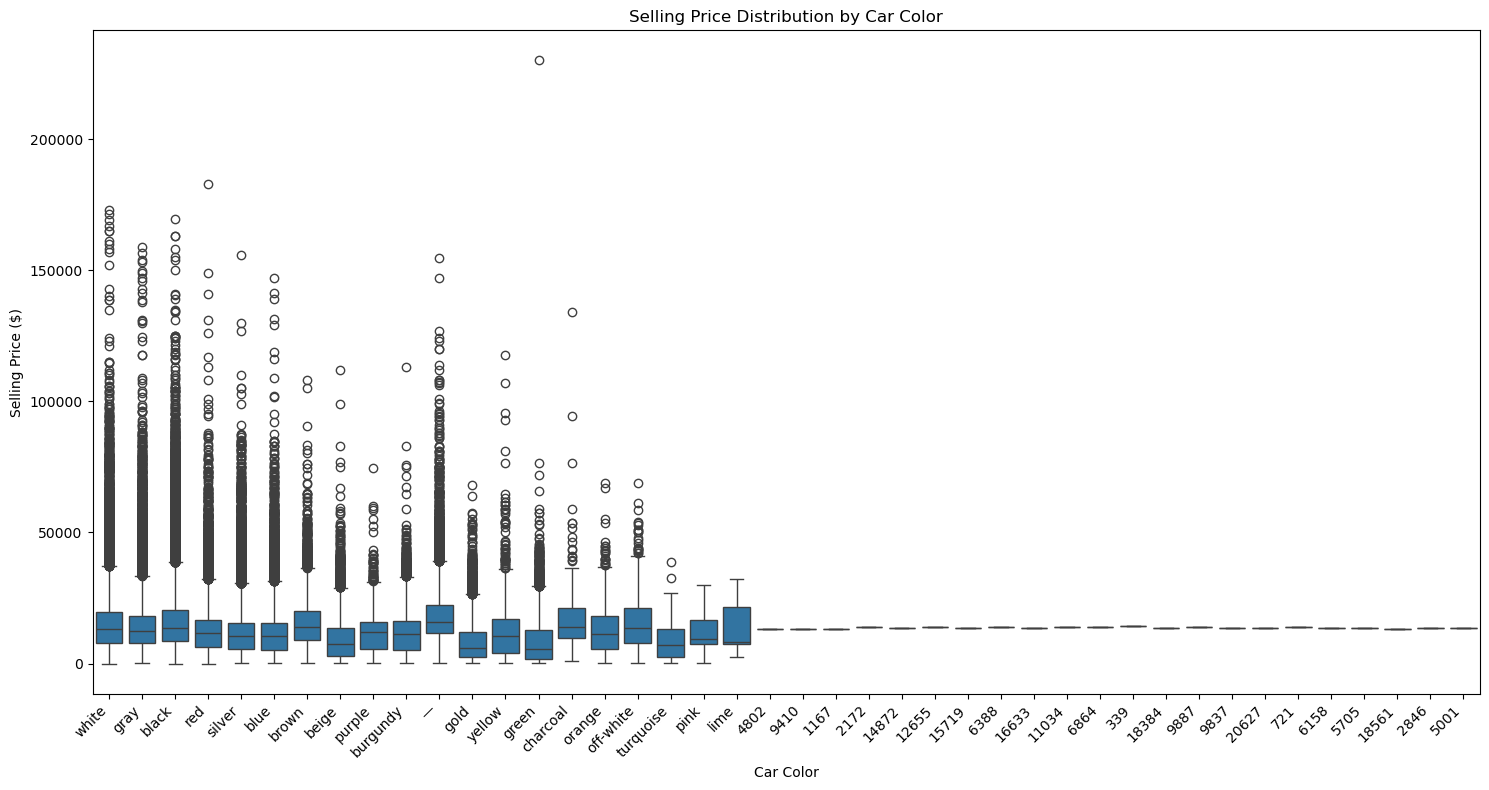

In [51]:
# Create a figure for the box plot
plt.figure(figsize=(15, 8))

# Generate a box plot of selling price by car color
sns.boxplot(x='color', y='sellingprice', data=car_df)

# Add title and labels
plt.title("Selling Price Distribution by Car Color")
plt.xlabel("Car Color")
plt.ylabel("Selling Price ($)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

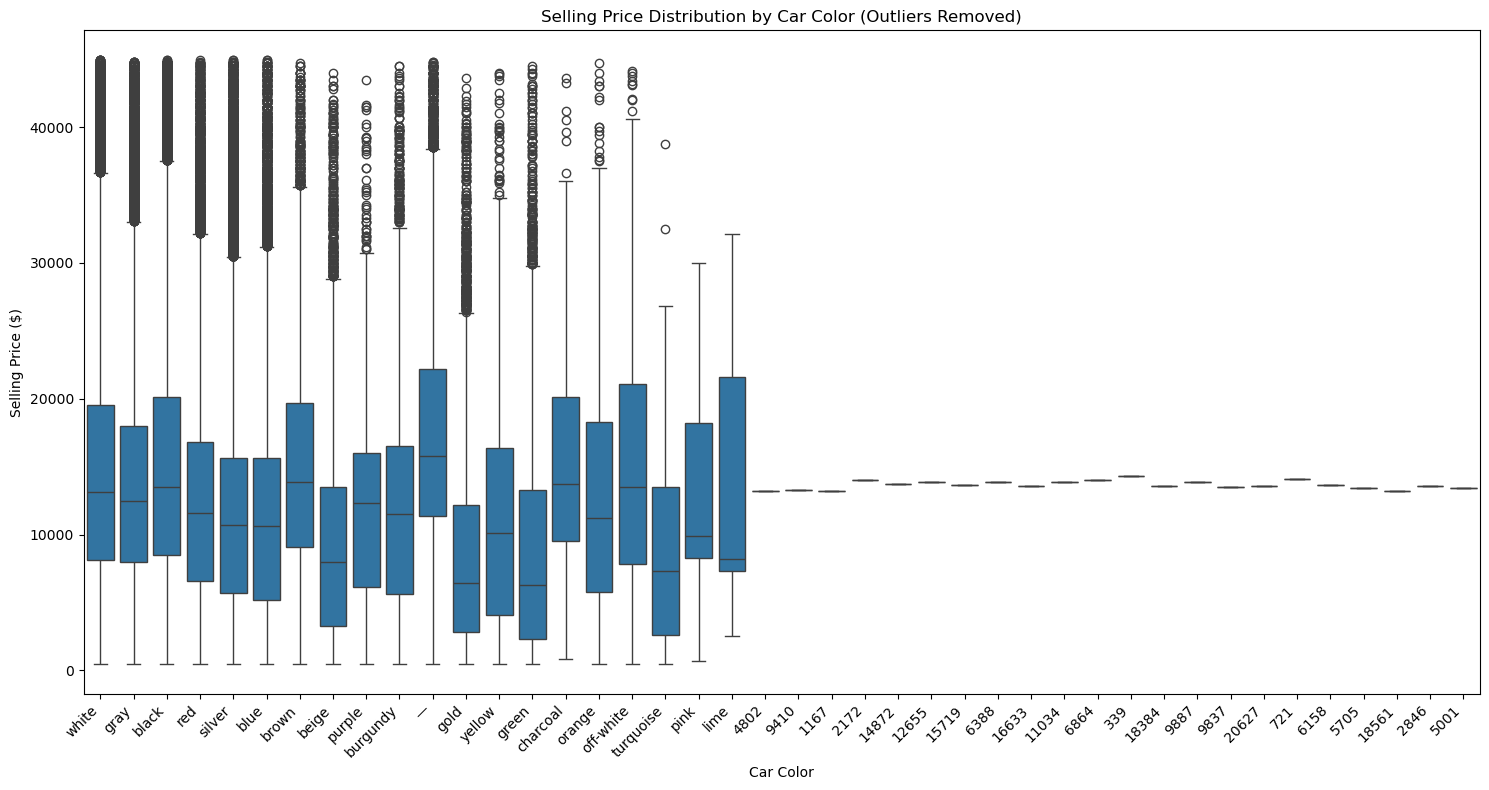

In [52]:
# Remove outliers by filtering the selling price
# Calculate the 1st and 99th percentiles of the 'sellingprice'
q1 = car_df['sellingprice'].quantile(0.01)
q99 = car_df['sellingprice'].quantile(0.99)

# Filter the DataFrame to keep only the data within the calculated percentiles
car_df_filtered_price = car_df[(car_df['sellingprice'] >= q1) & (car_df['sellingprice'] <= q99)].copy()

# Generate a box plot of selling price by car color after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(x='color', y='sellingprice', data=car_df_filtered_price)

# Add title and labels
plt.title("Selling Price Distribution by Car Color (Outliers Removed)")
plt.xlabel("Car Color")
plt.ylabel("Selling Price ($)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()